In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv]
!rm ~/.cache/matplotlib -rf

import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic")

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
fc-cache: invalid option -- ']'
usage: fc-cache [-EfrsvVh] [-y SYSROOT] [--error-on-no-fonts] [--force|--really-force] [--sysroot=SYSROOT] [--system-only] [--verbose] [--version] [--help] [dirs]
Build font information caches in [dirs]
(all directories in font configuration by default).

  -E, --error-on-no-fonts  raise an error if no fonts in a directory
  -f, --force              scan directories with apparently valid caches
  -r, --really-force       erase all existing caches, then rescan
  -s, --system-only        scan system-wide directories only
  -y, --sysroot=SYSROOT    prepend SYSROOT to all paths for scanning
  -v, --verbose            display status information while busy
  -V, --version            display font config version and exit
  -h, --help               di

In [2]:
from google.colab import drive
drive.mount("/content/mydrive/")
%cd /content/mydrive/MyDrive/LTSF_Linear

Drive already mounted at /content/mydrive/; to attempt to forcibly remount, call drive.mount("/content/mydrive/", force_remount=True).
/content/mydrive/MyDrive/LTSF_Linear


In [3]:
import os
from glob import glob
import pandas as pd
import numpy as np
import json
import missingno as msno
import matplotlib.pyplot as plt
plt.rc("font", family="NanumBarunGothic")
import seaborn as sns

In [4]:
root_path = "dataset/Water_Week"
dir_list = sorted(os.listdir(root_path))

# Empty Columns

1. 지점별 리스트
2. 지점별 개수 비교 
3. 제거 과정 및 결과

## (1) 지점별 리스트

In [5]:
n_lst = []
for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()

    for csv in data_list:
        df_ = pd.read_csv(csv)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)
    
    label_list = sorted(glob(os.path.join(root_path, dir, "hw3_json/*.json")))

    target_vals = []
    for js in label_list:
        with open(js, 'r') as f:
            label = json.load(f)
        input_cols = label['h']['input_serial'].split(',')
        target_cols = [k for k,v in label['w'].items() if(v is not None) & (k in num_cols)]
        vals = [label['w'][k] for k in target_cols]
        target_vals.append(vals)
    target_vals = np.array(target_vals)

    input = df_raw[num_cols]

    # 결측치를 list로 return 
    dirty_cols = input.isnull().sum()[input.isnull().sum() > 0]
    dirty_cols = pd.DataFrame(dirty_cols).T
    dirty_cols = list(dirty_cols.columns)

    n_lst.append(len(dirty_cols))

    print(f"{dir} input's missing cols: {dirty_cols}")

C001팔당2취 input's missing cols: ['DO', 'synedra', 'T-N', 'T-P', 'Mn']
D001청주정 input's missing cols: ['DO', 'TOC', 'algae', 'blue_algae', 'residual_Cl', 'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin', 'synedra', 'T-N', 'T-P', 'Mn']
D002구미 input's missing cols: ['DO', 'TOC', 'algae', 'blue_algae', 'residual_Cl', 'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin', 'synedra', 'T-N', 'T-P', 'Mn']
D003고령 input's missing cols: ['DO', 'TOC', 'algae', 'blue_algae', 'residual_Cl', 'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin', 'synedra', 'T-P', 'Mn']
D004주암 input's missing cols: ['DO', 'TOC', 'algae', 'blue_algae', 'residual_Cl', 'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin', 'synedra', 'T-N', 'T-P']
E003본포 input's missing cols: ['turbidity', 'water_temp', 'DO', 'TOC', 'algae', 'blue_algae', 'residual_Cl', 'blue-green_algae', 'diatomeae', 'cryptophyceae', '2-MIB', 'Geosmin', 'synedra', 'T-N'

## (2) 지점별 개수 비교

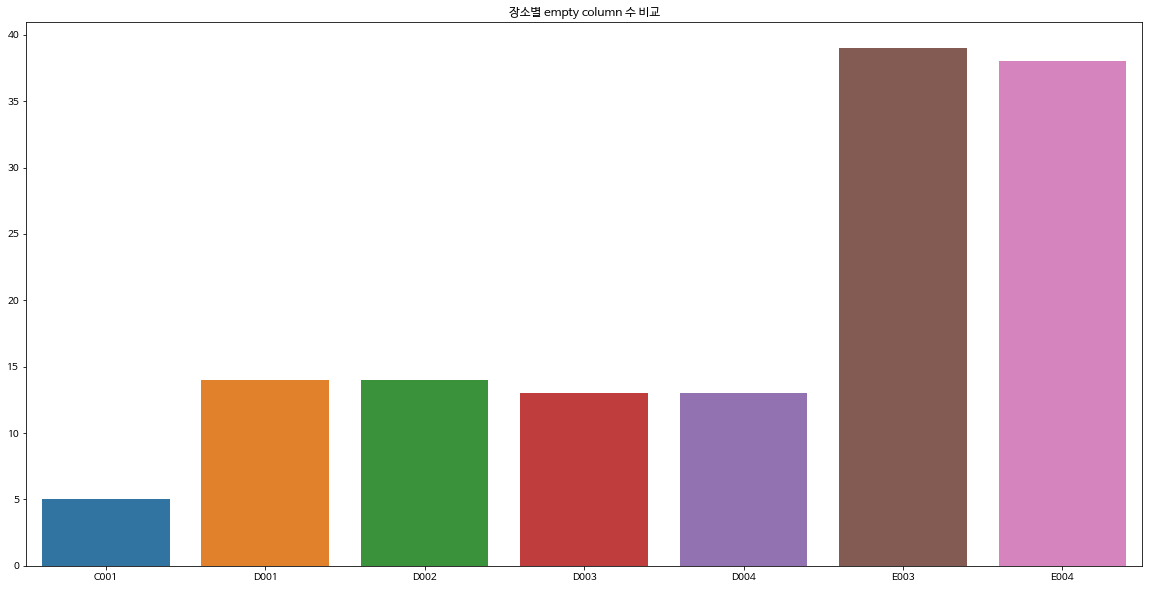

In [6]:
plt.figure(figsize=(20,10))
plt.title("장소별 empty column 수 비교")
sns.barplot(x=['C001','D001','D002','D003','D004','E003','E004'], y=n_lst)
plt.show()

## (3) 제거 과정 및 결과

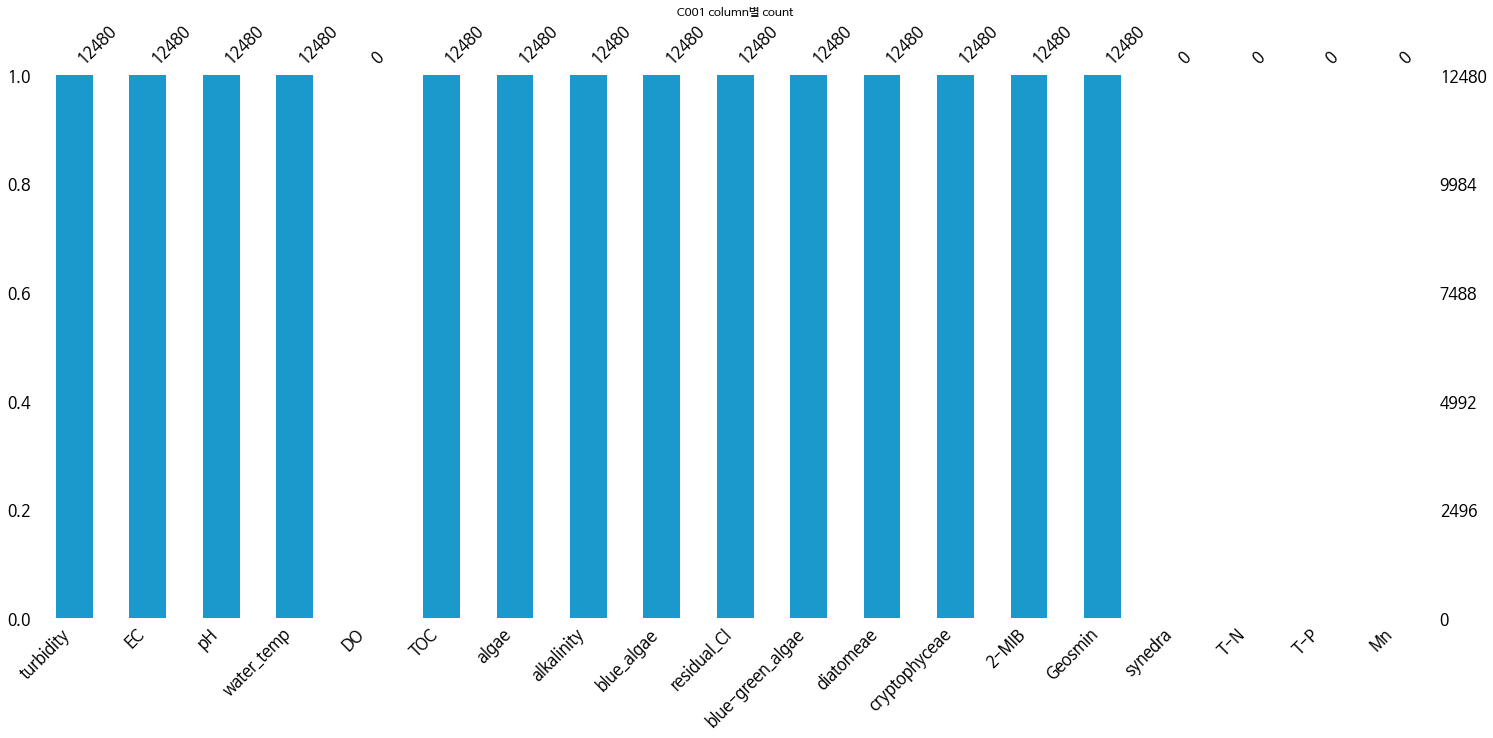

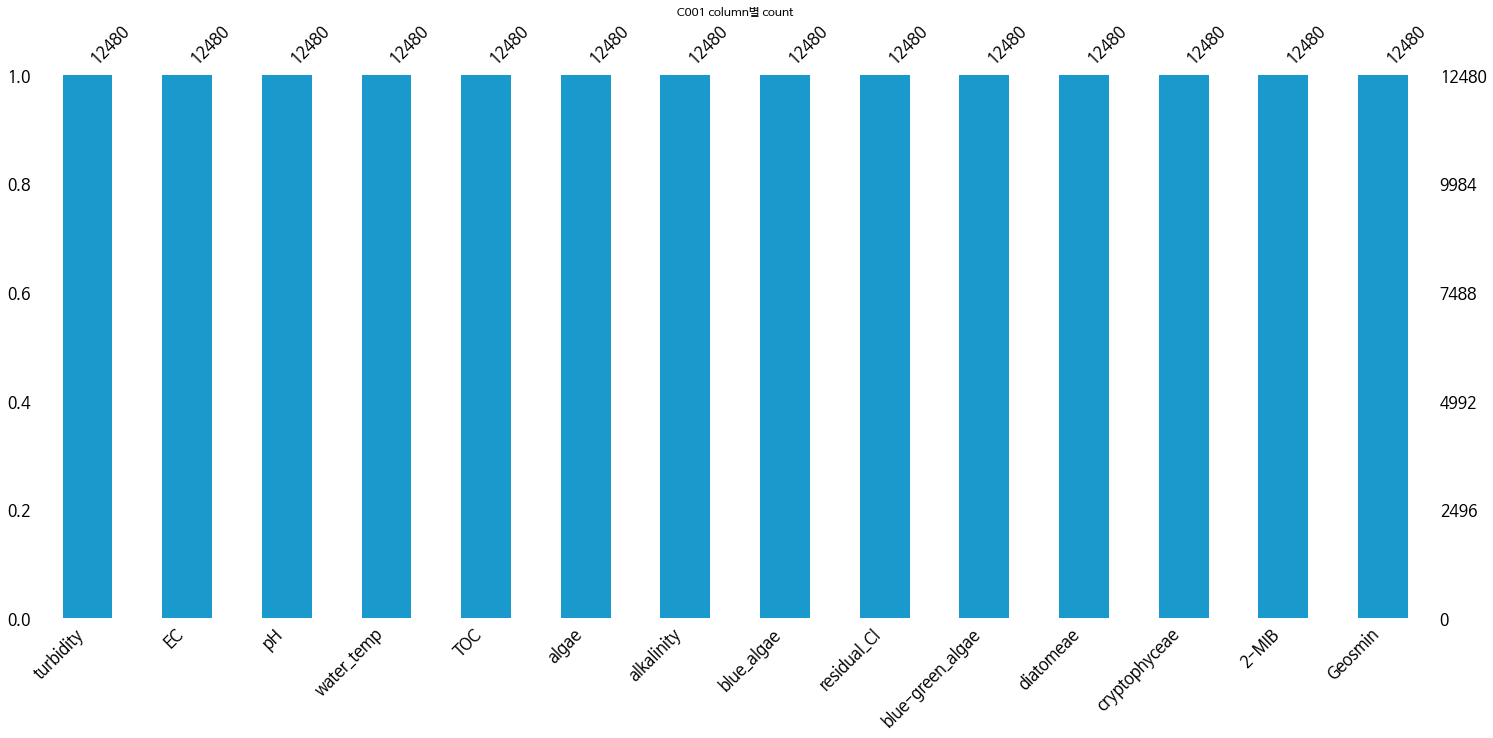

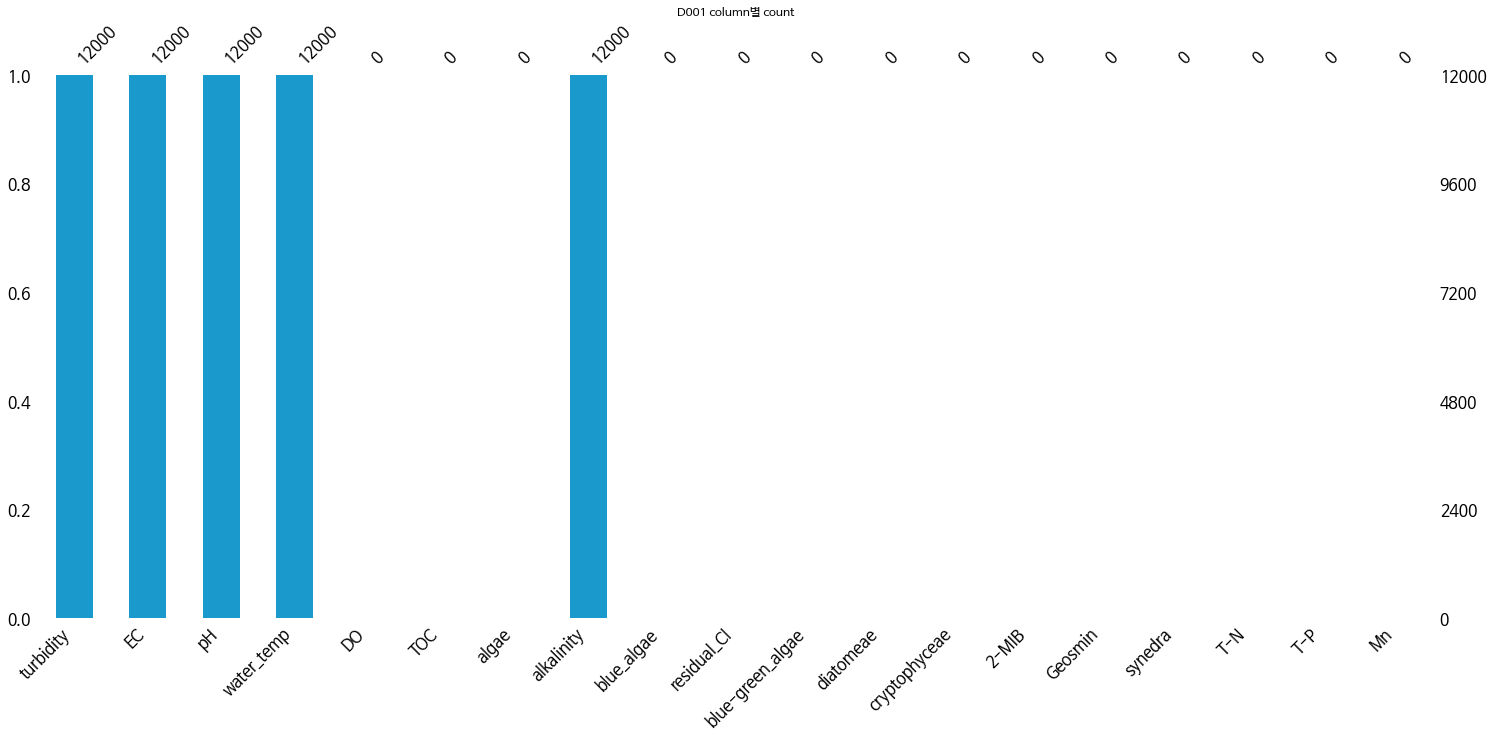

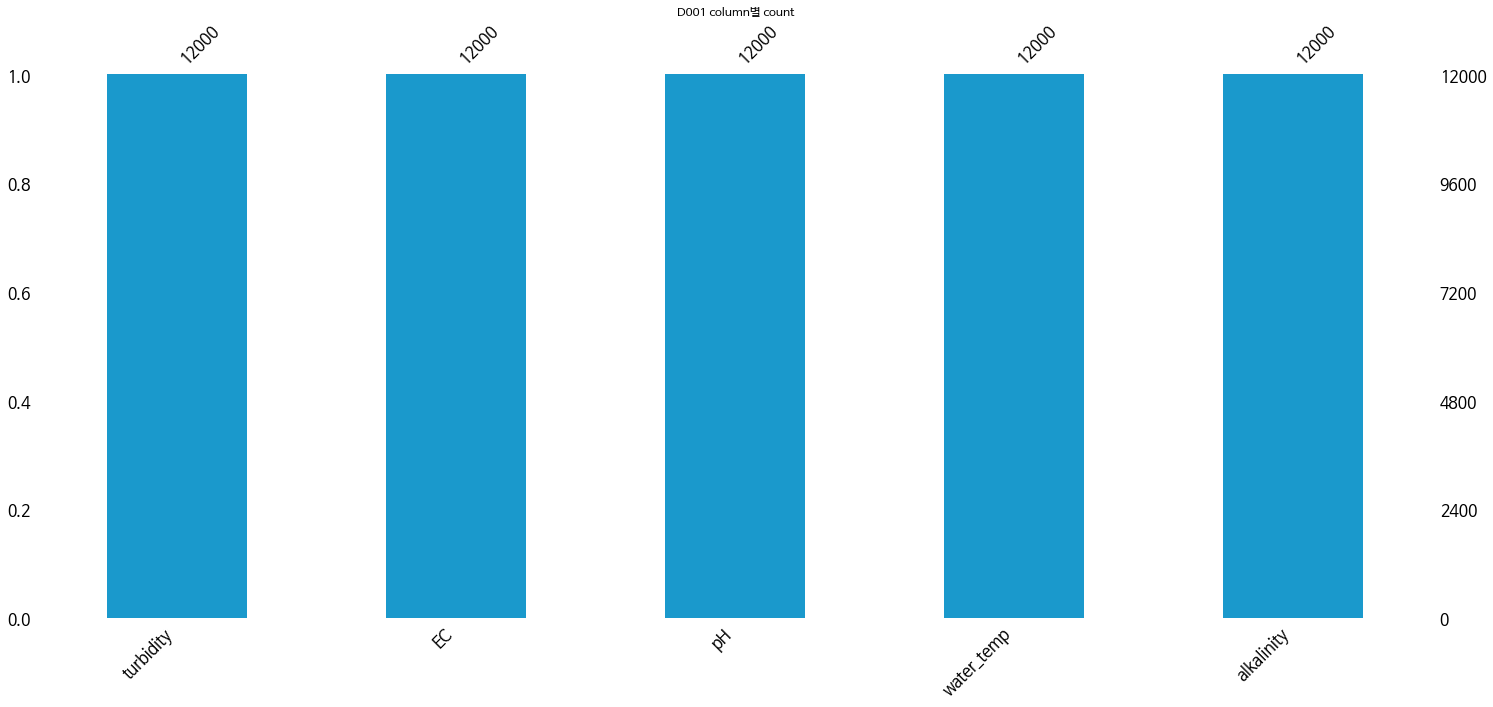

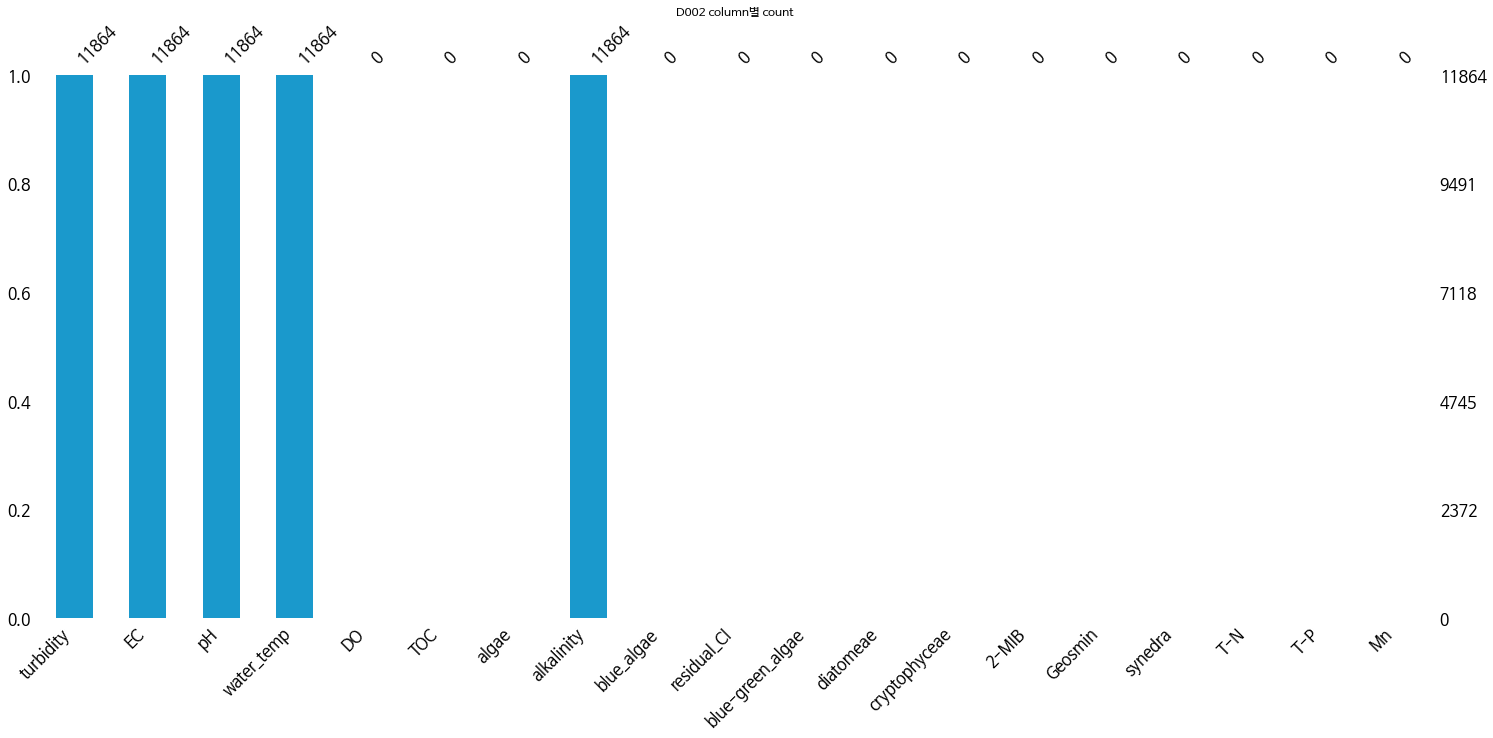

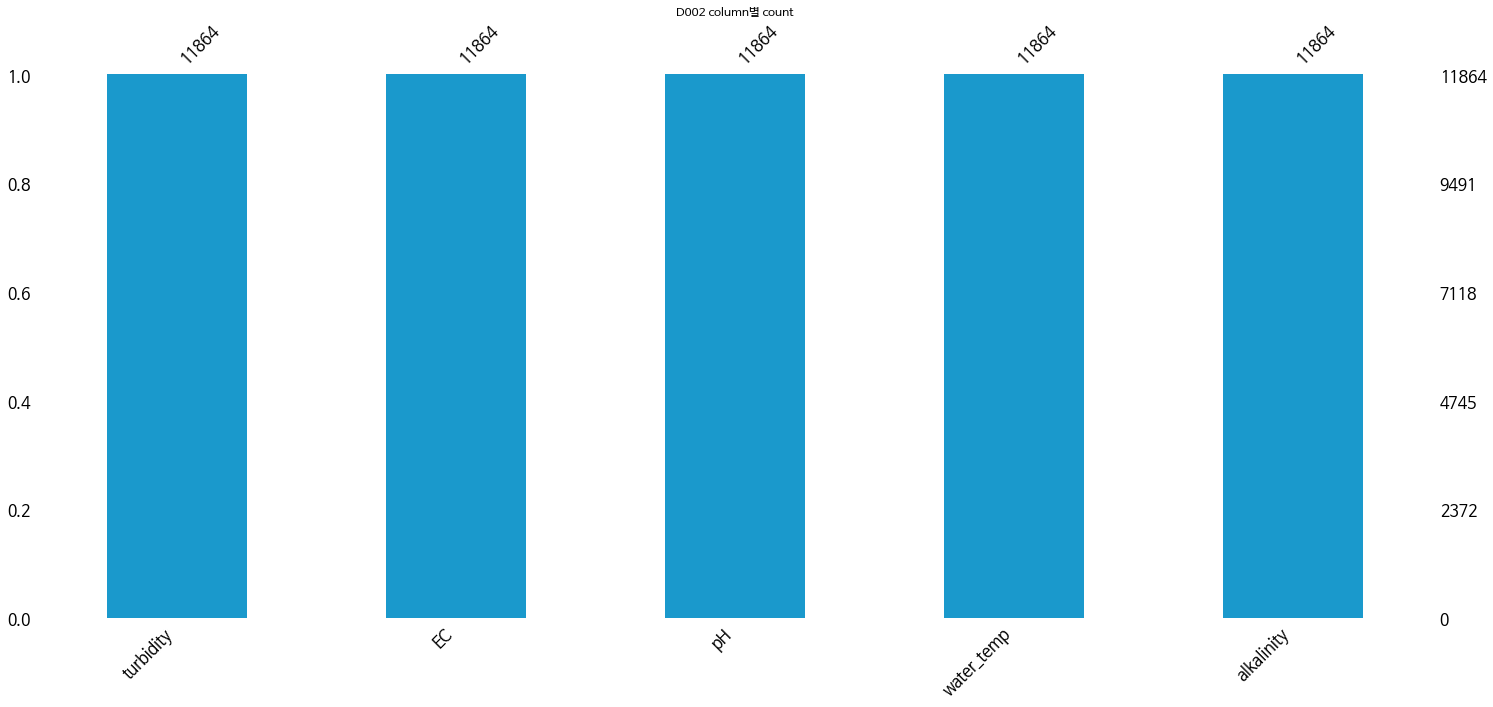

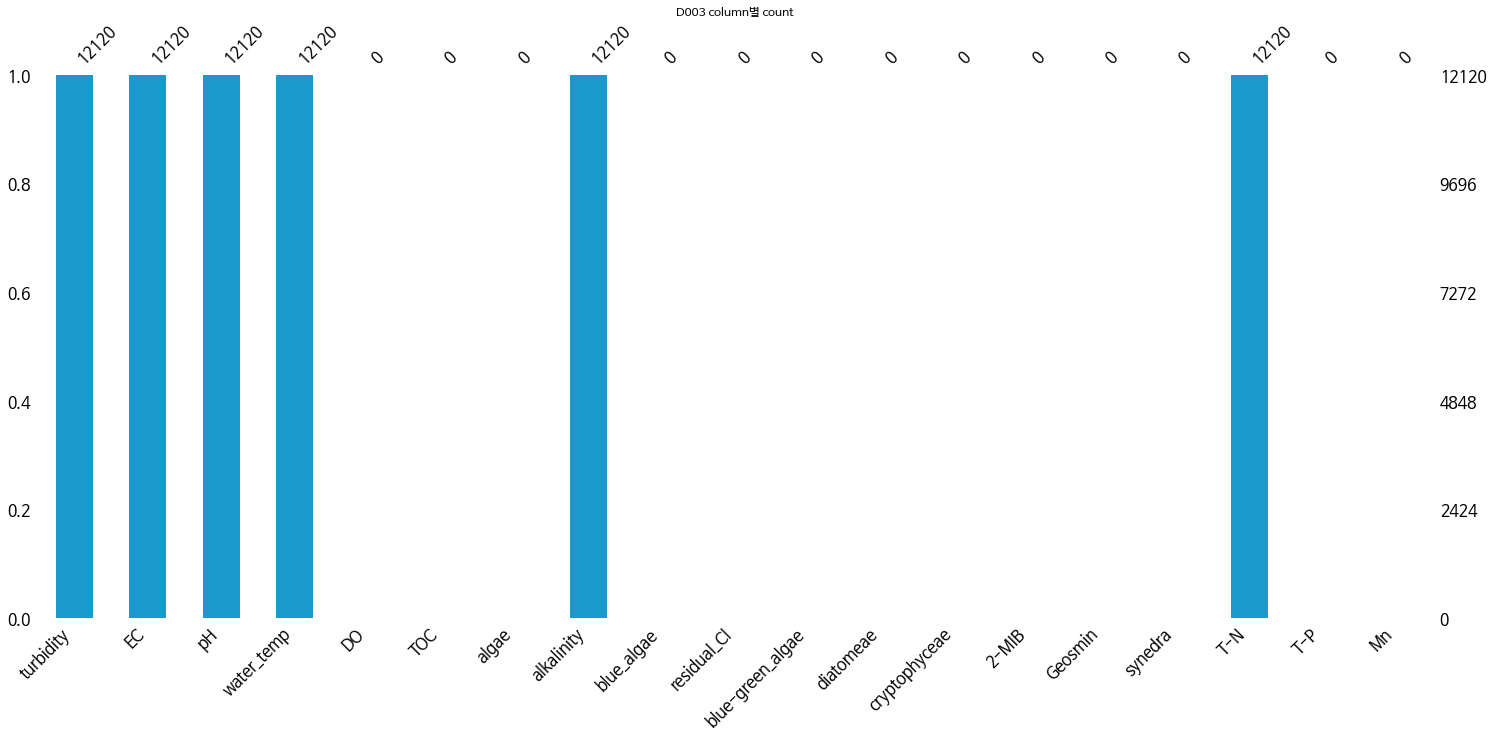

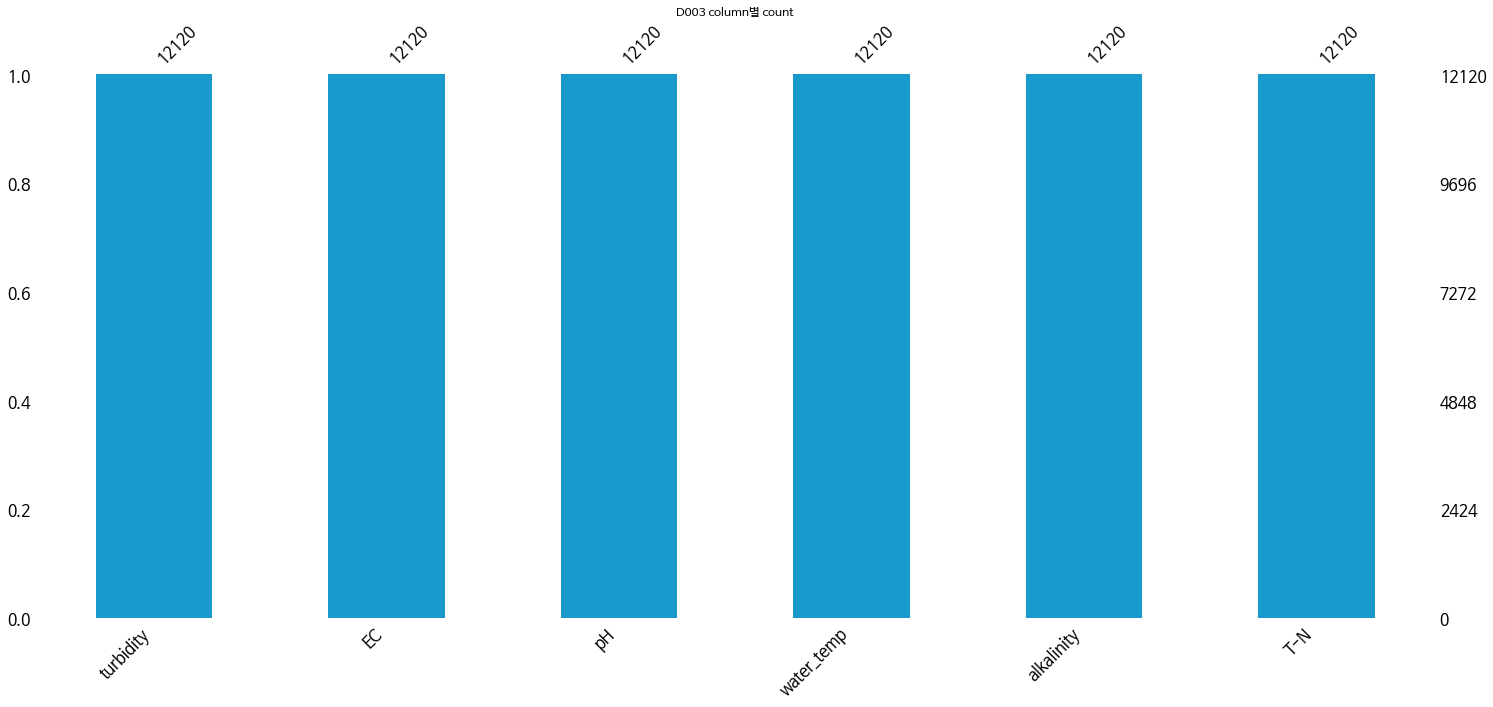

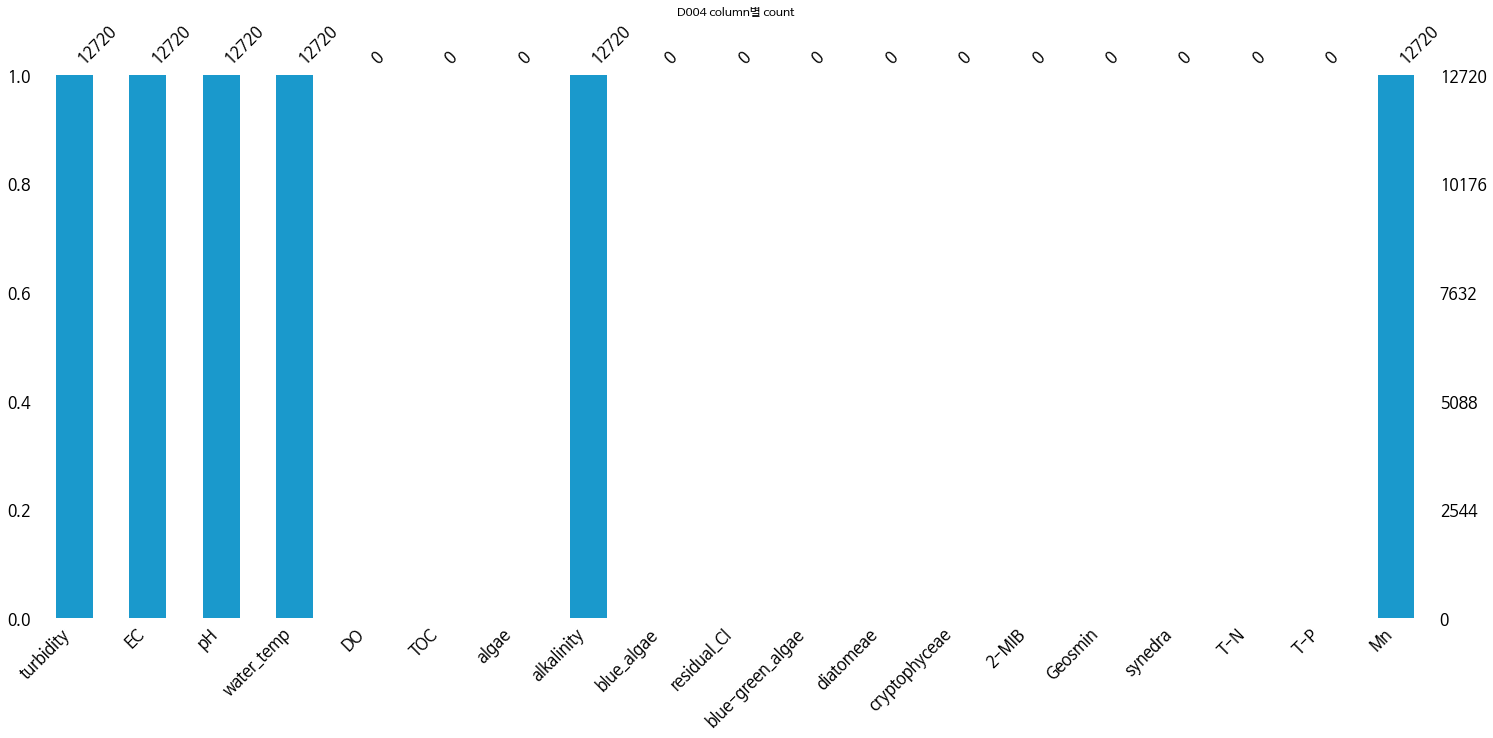

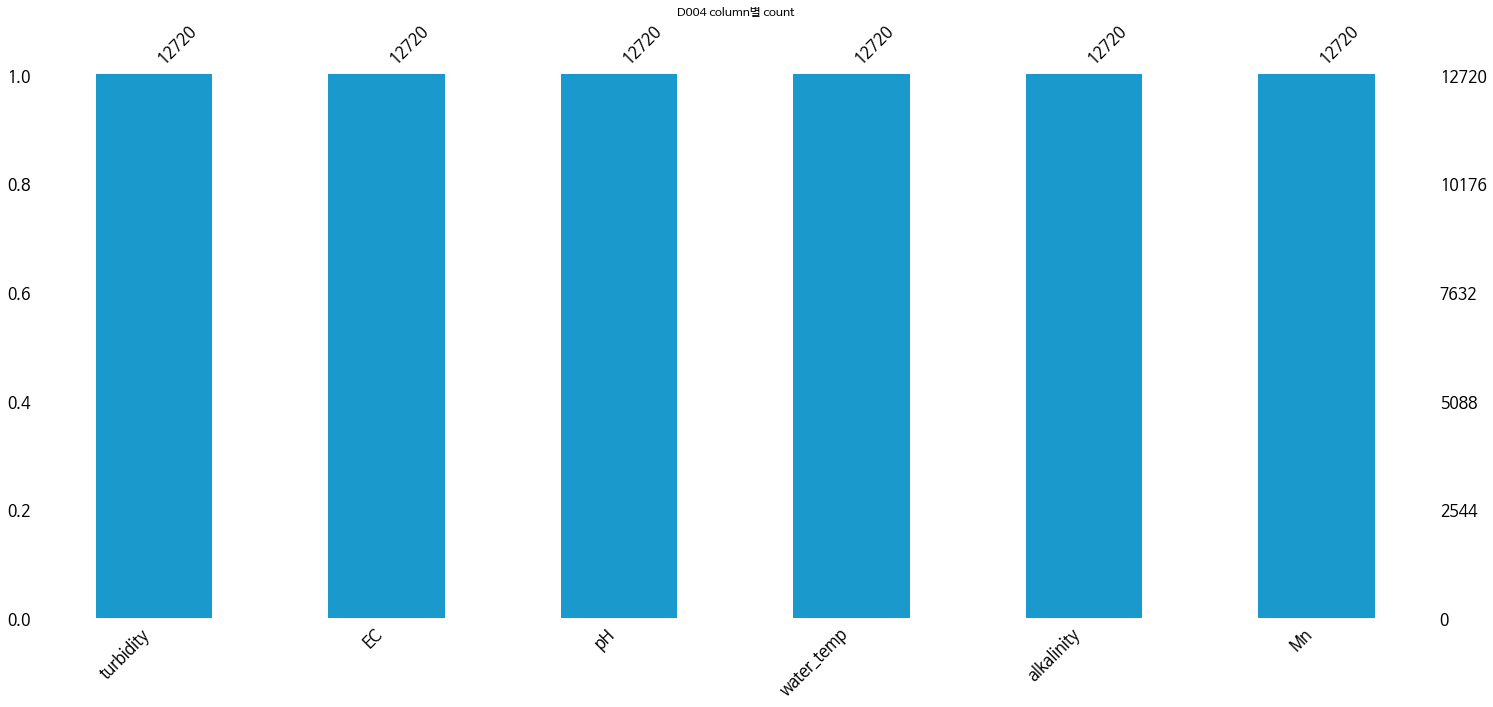

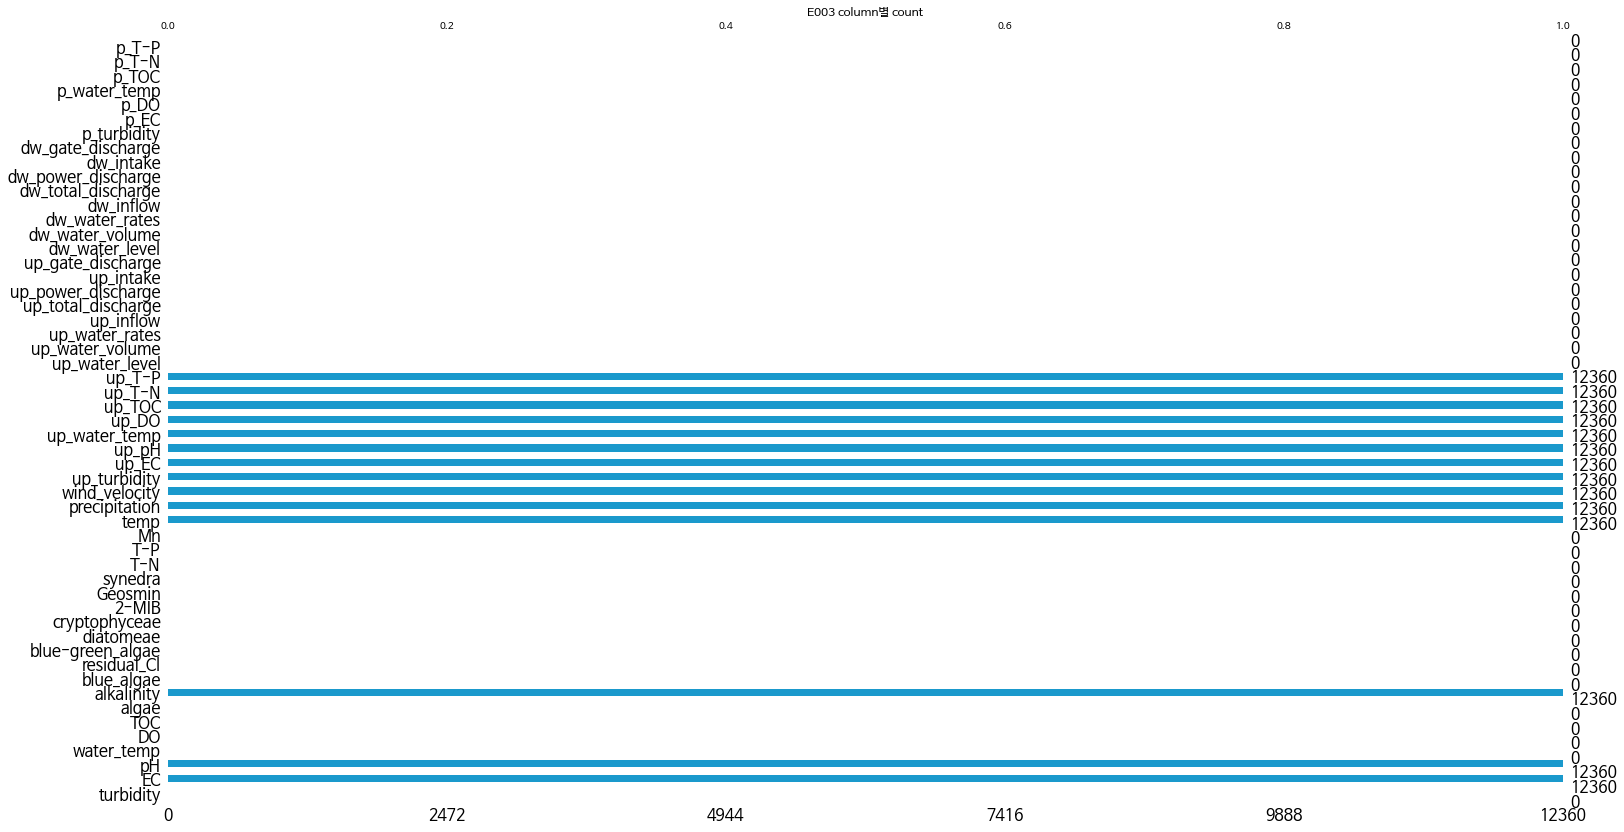

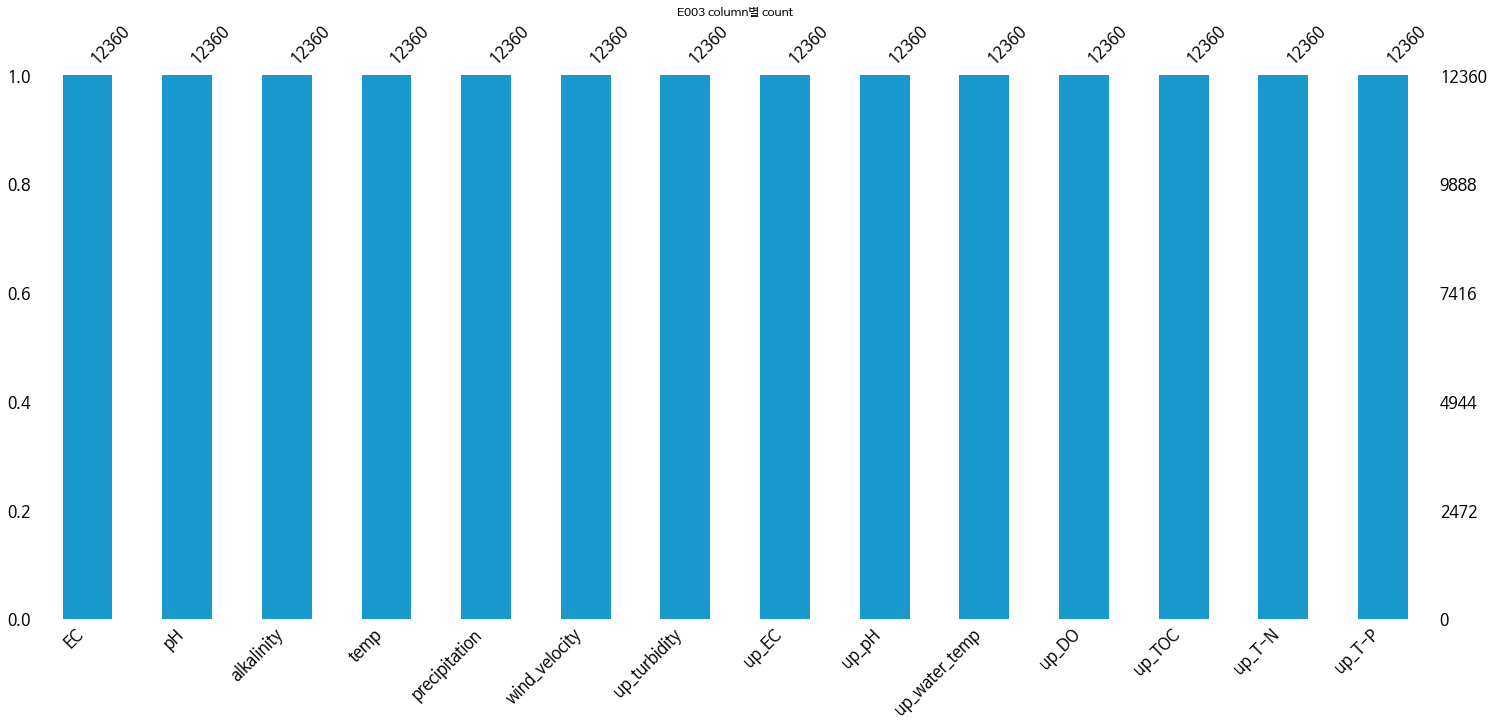

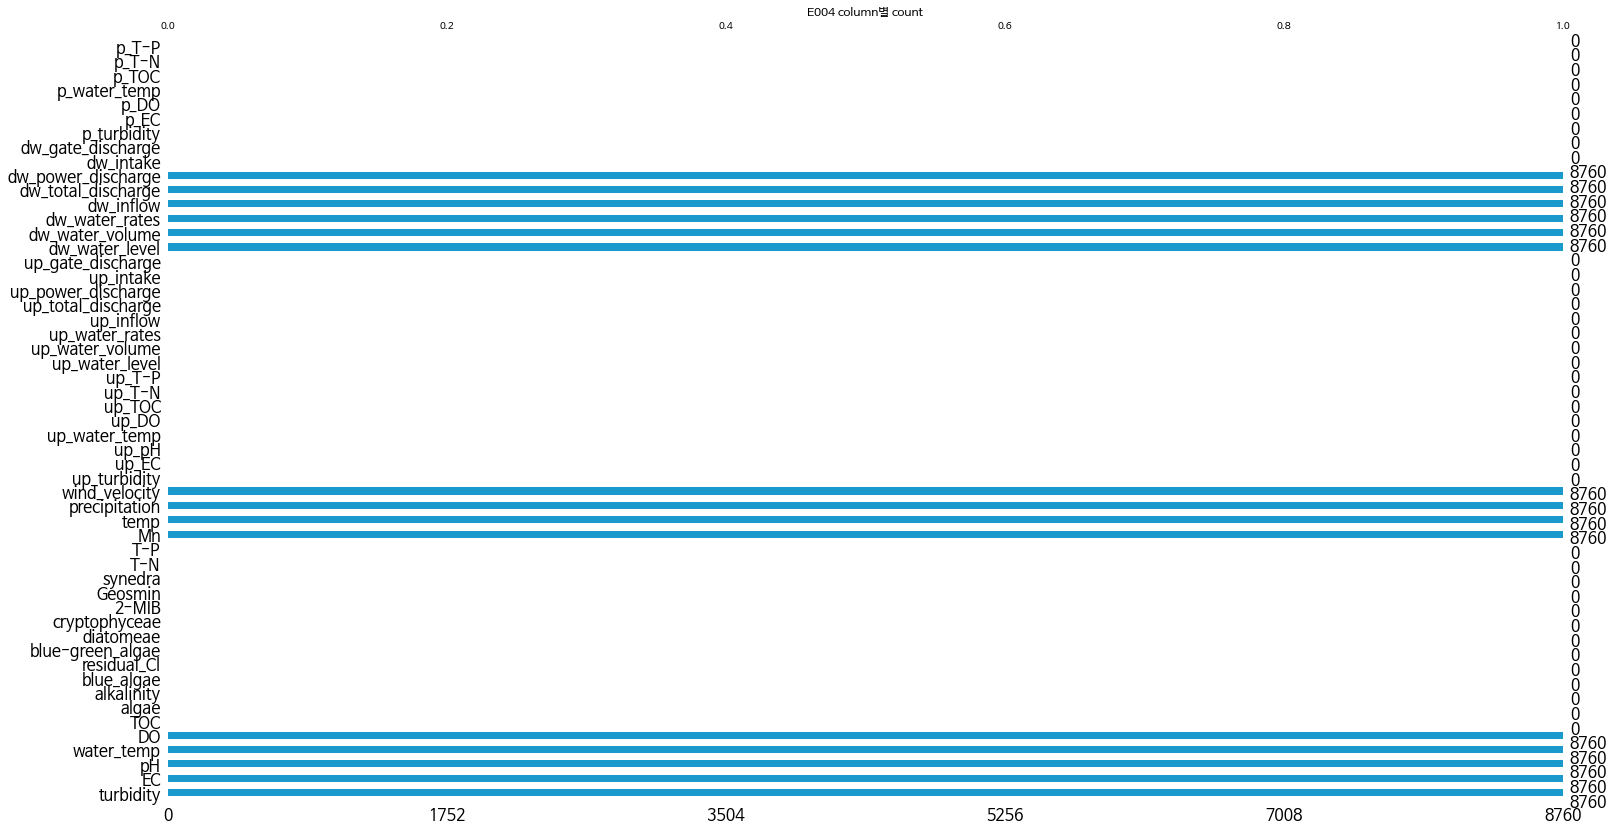

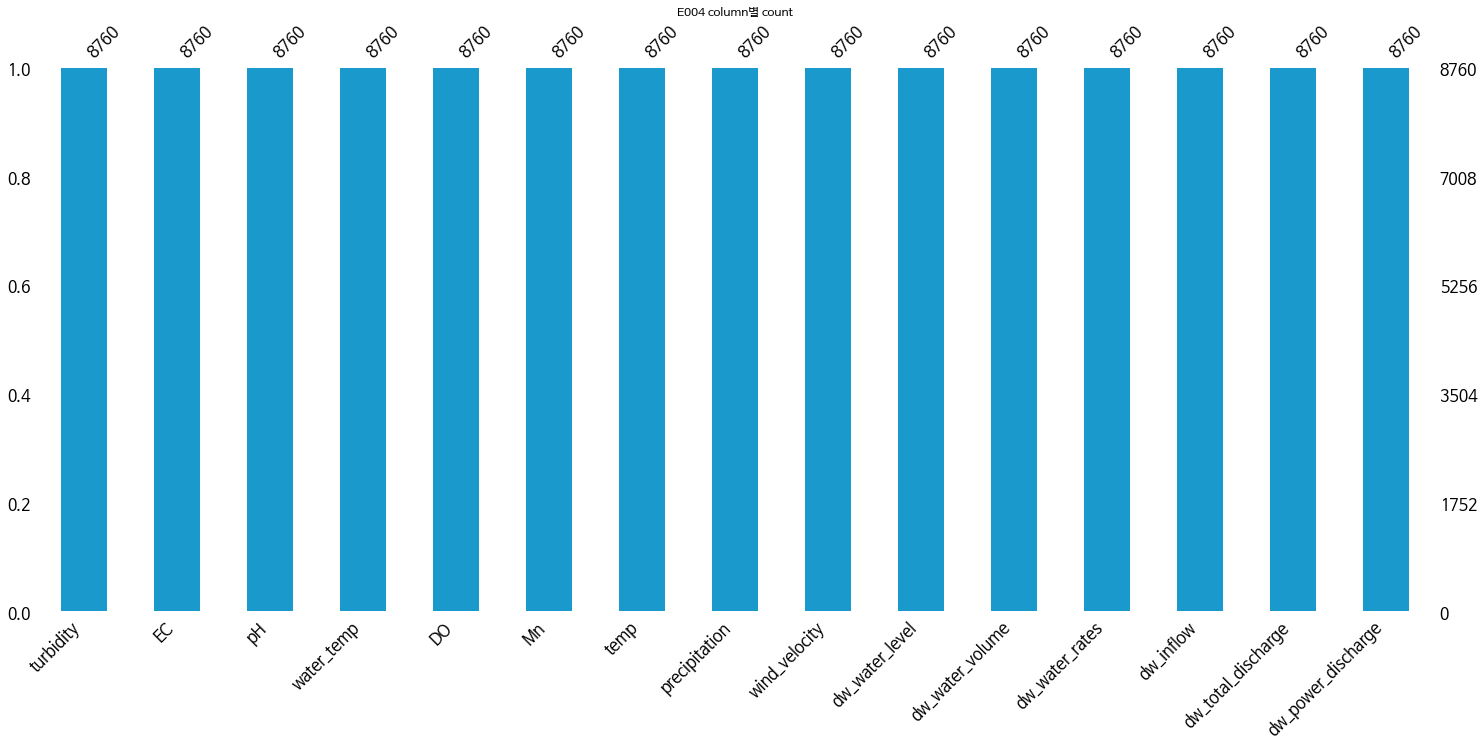

In [7]:
for dir in dir_list:
    data_list = sorted(glob(os.path.join(root_path, dir, "csv/*.csv")))

    df_raw = pd.DataFrame()

    for csv in data_list:
        df_ = pd.read_csv(csv)
        df_raw = pd.concat([df_raw, df_], axis=0, ignore_index=True)
    num_cols = list(df_raw.select_dtypes(include=np.number).columns)
    
    label_list = sorted(glob(os.path.join(root_path, dir, "hw3_json/*.json")))

    target_vals = []
    for js in label_list:
        with open(js, 'r') as f:
            label = json.load(f)
        input_cols = label['h']['input_serial'].split(',')
        target_cols = [k for k,v in label['w'].items() if(v is not None) & (k in num_cols)]
        vals = [label['w'][k] for k in target_cols]
        target_vals.append(vals)
    target_vals = np.array(target_vals)

    input = df_raw[num_cols]

    # missingo 바차트
    plt.title(f"{dir[:4]} column별 count")
    msno.bar(input, color=(0.1, 0.6, 0.8))
    plt.show()

    # 결측치 제거
    clean_input = input.copy()
    clean_input.dropna(axis=1, inplace=True)

    # missingo 바차트
    plt.title(f"{dir[:4]} column별 count")
    msno.bar(clean_input, color=(0.1, 0.6, 0.8))
    plt.show()